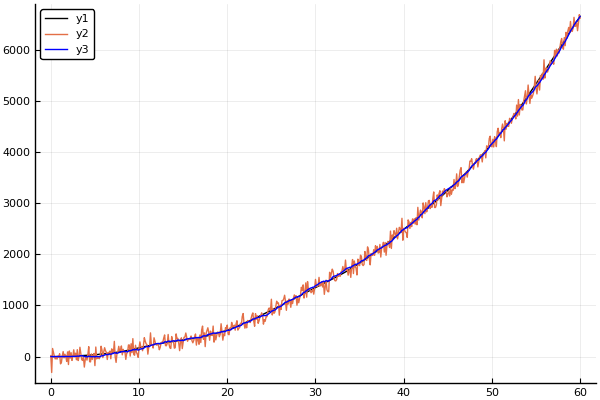

In [39]:
using Plots
pyplot();# pyplot attributes on backend
using LaTeXStrings;
using Compat, Random, Distributions
using LinearAlgebra
duration=60
dt=0.1
t=range(0,step=dt,duration)
measnoise = 100; # position measurement noise (feet)
accelnoise =20; # acceleration noise (feet/sec^2)
a = [1 dt; 0 1]; # transition matrix
b = [dt^2/2; dt]; # input matrix
c = [1 0]; # measurement matrix
x = [0; 0]; # initial state vector
xhat = x; # initial state estimate
Sz = [measnoise^2]; # measurement error covariance
Sw = accelnoise^2 * [dt^4/4 dt^3/2; dt^3/2 dt^2]; # process noise cov
P = Sw; # initial estimation covariance
# Initialize arrays for later plotting.
pos = zeros(0); # true position array
poshat =zeros(0); # estimated position array
posmeas = zeros(0); # measured position array
vel = zeros(0); # true velocity array
velhat = zeros(0); # estimated velocity array
for (index,value) in enumerate(t)
    # Use a constant commanded acceleration of 1 foot/sec^2.
    if isless(value,15)
        u = 1;
    else
        u = 5;
    end
    # Simulate the linear system.
    ProcessNoise = accelnoise * [(dt^2/2)*rand(Normal()); dt*rand(Normal())];
    x = a * x + b * u + ProcessNoise;
    # Simulate the noisy measurement
    MeasNoise = [measnoise * rand(Normal())];
    y =  c * x + MeasNoise;
    # Extrapolate the most recent state estimate to the present time.
    xhat = a * xhat + b * u;
    # Form the Innovation vector.
    Inn =  y - c * xhat;
    # Compute the covariance of the Innovation.
    s =  c * P * transpose(c)  + Sz;
    # Form the Kalman Gain matrix.
    K =  a * P * transpose(c)  * inv(s);
    # Update the state estimate.
    xhat = xhat + K * Inn;
    # Compute the covariance of the estimation error.
    P = a * P * transpose(a) - a * P * transpose(c) * inv(s) * c * P * transpose(a) + Sw;
    # Save some parameters for plotting later.
    pos = append!(pos, x[1]);
    posmeas = append!(posmeas, y);
    poshat = append!(poshat, xhat[1]);
    vel = append!(vel, x[2]);
    velhat = append!(velhat, xhat[2]);
    #print(poshat)
    #print("\n")
end
plot(t,pos,lc=:black)
plot!(t,posmeas)
plot!(t,poshat,lc=:blue)